In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


In [5]:
#df.isna().sum()

In [8]:
df.Class.value_counts()

Class
0    1974
1      26
Name: count, dtype: int64

In [14]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [15]:
# Code here: Train Test Split

In [16]:
# Code here: Scaling

In [17]:
np.sum(y_train)/y_train.shape[0], np.sum(y_test)/y_test.shape[0], np.sum(y)/y.shape[0]

(0.013125, 0.0125, 0.013)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
def get_metrics(y_true, y_pred, y_prob, train=True, show_roc = True):
    sk_acc = accuracy_score(y_pred=y_pred, y_true = y_true)
    sk_prec = precision_score(y_pred=y_pred, y_true = y_true)
    sk_rec = recall_score(y_pred=y_pred, y_true = y_true)
    sk_f1 = f1_score(y_pred=y_pred, y_true = y_true)

    fpr, tpr, thresholds = roc_curve(y_true, y_prob[:, 1])

    # Compute the Area Under the Curve (AUC) for the ROC curve
    roc_auc = auc(fpr, tpr)

    # Compute Youden's J statistic for each threshold
    youden_j = tpr - fpr
    optimal_threshold_index = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_threshold_index]

    print("------------------------------------------------------------------")
    if train:
        print("Training Set Metrics")
    else:
        print("Test Set Metrics")
    conf_matrix= confusion_matrix(y_true= y_true, y_pred = y_pred)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["Not Fraud", "Fraud"])
    plt.figure(figsize= (8,6))
    cm_display.plot()
    plt.show()

    print(f"Accuracy {np.round(sk_acc*100,2)}%, Precision {np.round(sk_prec*100,2)}%, Recall {np.round(sk_rec*100,2)}%, F1 Score {np.round(sk_f1*100,2)}%")

    if train and show_roc:
        print(f"Area Under Curve {roc_auc}, optimal threshold {optimal_threshold}")

        plt.figure(figsize=(4, 3))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
        plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve Training')
        plt.legend(loc='lower right')
        plt.show()

In [19]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   --------- ----------------------------- 61.4/258.3 kB 409.6 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.3 MB/s eta 0:00:00


In [20]:
# Code here: Import SMOTE

In [28]:
# Code here: Create SMOTE

In [29]:
# Code here: Use fit_resample to fit , get new X_train_sc1, y_train_sc1

In [30]:
X_train_sc1.shape, X_train_sc.shape

((2526, 30), (1600, 30))

In [31]:
y_train_sc1.sum()/2526

0.3749010292953286

In [33]:
# Code here: Import DecisionTreeClassifier

In [34]:
# Code here: Create and fit your model on the new X_train_sc1,y_train_sc1

In [40]:
y_tr_pred = dt_model.predict(X_train_sc1)
y_tr_prob = dt_model.predict_proba(X_train_sc1)
y_ts_pred = dt_model.predict(X_test_sc)
y_ts_prob = dt_model.predict_proba(X_test_sc)

------------------------------------------------------------------
Test Set Metrics


<Figure size 800x600 with 0 Axes>

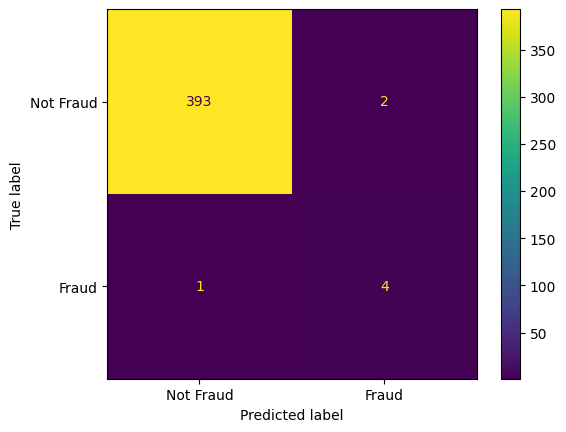

Accuracy 99.25%, Precision 66.67%, Recall 80.0%, F1 Score 72.73%


In [41]:
get_metrics(y_true=y_test, y_pred = y_ts_pred, y_prob = y_ts_prob, train=False)